# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

### Primer integrante:

Nombre: Santiago Alexis Sánchez Zuleta


#### Segundo integrante:

Nombre: Raúl Andrés Goméz Ramírez


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Contextualización del problema

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [0]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository.
X = db[:,0:12]
Y = db[:,12]

#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




La base de datos que tomamos cuenta con 9357 muestras.

In [147]:
X.shape



(9357, 12)

1.2 Cuántas caracteristicas tiene el problema?: 



De la base de datos asignadas en X tomamos 12 caracteristicas, aunque podrian ser mas dado que en la base de datos de origen cuentan con 15 caracteristicas.

In [148]:

X.shape

(9357, 12)

<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

## Ejercicio 2: Completar código 

Analice los siguientes métodos de la teoría vista para los modelos de *regresión polinomial múltiple*, tales como el error cuadrático medio (<font color='blue'>ECM</font>), modelo de regresión múltiple (<font color='blue'>regression</font>), potencia del polinomio (<font color='blue'>potenciaPolinomio</font>) y gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente: 
1. Completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

2. Graficar el error cuadrático: Error cuadrático medio (ECM) vs. las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes, puedes consultar documentación [aquí](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [0]:
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio

def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


In [0]:
"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""

def gradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    
    #Aquí se completa el código
    for iter in range(iteraciones):
        errorIteracion= ECM(regression(X,W),Y)
        ecms[iter]=errorIteracion
        derivadaErr = X.T.dot(X.dot(W) - Y)
        W = W - (eta/N) * derivadaErr
        

 
       
        
        
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.plot(ecms)
    plt.ylabel('ECMS')
    plt.xlabel('Iteraciones')
    plt.title('Grafica ECMS vs Iteracciones' )
    plt.show()
            

    trainingError = str(ecms[-1])
    
    return W,trainingError
    

## Ejercicio 3: Entrenamiento

En este punto debe hacer uso de las funciones escritas en el punto anterior para realizar el proceso de *modelamiento y simulación* de los datos de cargados en el Ejercicio # 1 sobre la predicción del valor de la humedad absoluta en el aire 

A continuación complete el siguiente código llamando a la función <font color='blue'>gradiente_descedente</font> pasandole los parámetros correspondientes (X,y,eta). Debe obtener como salida el vector de parámetros $w$ estimado y la gráfica del error cuadrático medio vs iteraciones.

*Nota*: No olvide definir el grado del polinomio y la taza de aprendizaje (eta)

In [0]:
from numpy import random
from numpy import matlib
import math


def simulacion(grado,eta,grafo=True,normalizar=True):
    N = np.size(X,0)

    # #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    X2 = potenciaPolinomio(X,grado)

    #Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
    random.seed(1)
    ind=np.random.permutation(N)
    Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]
    if normalizar:
      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    #eta = 0.00001

    #Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
    W ,trainingError= gradiente_descendente(Xtrain, Ytrain, eta)

    #Evaluamos las predicciones del modelo con los datos de test
    unos = np.array([np.ones(np.size(Xtest,0))])
    Xtest = np.concatenate((unos.T, Xtest), axis=1)
    Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
    Yest = regression(Xtest, W)
    Error = ECM(Yest,Ytest)
    if grafo:
      print ('\nError durante la prueba = ' + str(Error))
    return(W,Error,trainingError)

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.007918  ]
 [ 0.15133837]
 [ 0.00093386]
 [ 0.19286465]
 [ 0.12758939]
 [-0.01766481]
 [ 0.12403046]
 [-0.01095359]
 [ 0.13629102]
 [ 0.10329616]
 [ 0.19229168]
 [ 0.18536155]]

Error Final durante el entrenamiento = 774.0544407909563


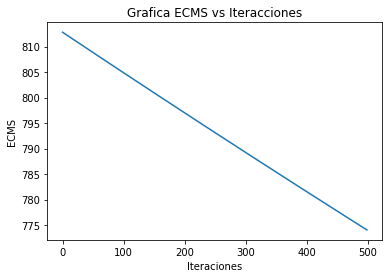


Error durante la prueba = 703.3758081471533


(array([[-0.03558286],
        [-0.007918  ],
        [ 0.15133837],
        [ 0.00093386],
        [ 0.19286465],
        [ 0.12758939],
        [-0.01766481],
        [ 0.12403046],
        [-0.01095359],
        [ 0.13629102],
        [ 0.10329616],
        [ 0.19229168],
        [ 0.18536155]]), 703.3758081471533, '774.0544407909563')

In [152]:
simulacion(1,0.00001)

#### Responda:

3.1 ¿Cuál es el número de coeficientes $w$ que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:



Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00770227]
 [ 0.14709973]
 [ 0.00061704]
 [ 0.18800566]
 [ 0.12381181]
 [-0.01754871]
 [ 0.12141667]
 [-0.01082293]
 [ 0.13236987]
 [ 0.1001097 ]
 [ 0.18756399]
 [ 0.18086726]
 [ 0.00746271]
 [ 0.08129778]
 [ 0.00169241]
 [-0.19111213]
 [ 0.05914778]
 [-0.02307037]
 [ 0.05295177]
 [-0.01128938]
 [ 0.0737229 ]
 [ 0.04530771]
 [-0.19093383]
 [-0.18625815]
 [-0.00747041]
 [ 0.05597472]
 [ 0.00217411]
 [ 0.19115563]
 [ 0.04042299]
 [-0.02392493]
 [ 0.03310235]
 [-0.01657252]
 [ 0.05109358]
 [ 0.03064378]
 [ 0.1911646 ]
 [ 0.19046046]
 [ 0.00747017]
 [ 0.03974982]
 [ 0.0019453 ]
 [-0.19116631]
 [ 0.02816681]
 [-0.02271886]
 [ 0.02002128]
 [-0.01553689]
 [ 0.03685883]
 [ 0.02176378]
 [-0.19116419]
 [-0.19103112]]

Error Final durante el entrenamiento = 703.4089638629132


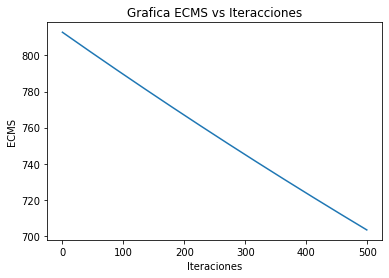


Error durante la prueba = 711.3700120556157


(49, 1)

In [153]:
P,Q,R=simulacion(4,0.00001)
P.shape

Cuenta con 49 coeficientes por que cada una de las caracteristicas(las cuales son 12 ) se le agrega 12 valores por grado que se tenga, que corresponden a sus caracteristicas elevados al grado del polinomio, ejemplo contamos con 12 caracteristicas en un polinomio grado 4 seria 12x4= 48 pero se suma el termino independiente lo que lo convierte en 49.

3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:

Por que no se consideran los terminos cruzados dados por la correlacion entre las caracteristicas que pueden hacer mas eficiente o menos eficiente un algoritmo.

## Ejercicio 4: Obtener resultados

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


Vector de parámetros del modelo:

[[-0.03558286]
 [-0.007918  ]
 [ 0.15133837]
 [ 0.00093386]
 [ 0.19286465]
 [ 0.12758939]
 [-0.01766481]
 [ 0.12403046]
 [-0.01095359]
 [ 0.13629102]
 [ 0.10329616]
 [ 0.19229168]
 [ 0.18536155]]

Error Final durante el entrenamiento = 774.0544407909563


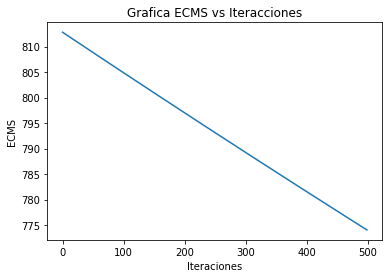

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.0078588 ]
 [ 0.14977074]
 [ 0.00078996]
 [ 0.19110847]
 [ 0.12616802]
 [-0.01766438]
 [ 0.12313615]
 [-0.01094838]
 [ 0.13482863]
 [ 0.10209344]
 [ 0.19058582]
 [ 0.18377325]
 [ 0.00762248]
 [ 0.08306981]
 [ 0.00191763]
 [-0.19415493]
 [ 0.06059688]
 [-0.02324205]
 [ 0.05359709]
 [-0.01135672]
 [ 0.07537228]
 [ 0.0464961 ]
 [-0.19398785]
 [-0.18923539]]

Error Final durante el entrenamiento = 748.1860686316447


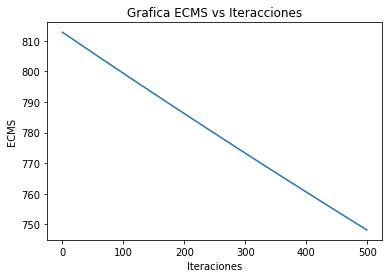

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00775955]
 [ 0.14837627]
 [ 0.00069365]
 [ 0.18951096]
 [ 0.12493246]
 [-0.01760602]
 [ 0.12227383]
 [-0.01086343]
 [ 0.13353977]
 [ 0.10104578]
 [ 0.18903603]
 [ 0.18227426]
 [ 0.00752101]
 [ 0.08212541]
 [ 0.00179314]
 [-0.19259582]
 [ 0.05981837]
 [-0.02317498]
 [ 0.05328485]
 [-0.01135283]
 [ 0.07449081]
 [ 0.04585204]
 [-0.19242182]
 [-0.18771517]
 [-0.00752867]
 [ 0.05662316]
 [ 0.00227227]
 [ 0.192648  ]
 [ 0.0409618 ]
 [-0.02405244]
 [ 0.03331097]
 [-0.01666121]
 [ 0.05170587]
 [ 0.03107971]
 [ 0.19265603]
 [ 0.19194422]]

Error Final durante el entrenamiento = 724.9884414455062


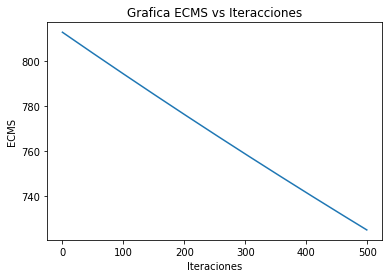

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00770227]
 [ 0.14709973]
 [ 0.00061704]
 [ 0.18800566]
 [ 0.12381181]
 [-0.01754871]
 [ 0.12141667]
 [-0.01082293]
 [ 0.13236987]
 [ 0.1001097 ]
 [ 0.18756399]
 [ 0.18086726]
 [ 0.00746271]
 [ 0.08129778]
 [ 0.00169241]
 [-0.19111213]
 [ 0.05914778]
 [-0.02307037]
 [ 0.05295177]
 [-0.01128938]
 [ 0.0737229 ]
 [ 0.04530771]
 [-0.19093383]
 [-0.18625815]
 [-0.00747041]
 [ 0.05597472]
 [ 0.00217411]
 [ 0.19115563]
 [ 0.04042299]
 [-0.02392493]
 [ 0.03310235]
 [-0.01657252]
 [ 0.05109358]
 [ 0.03064378]
 [ 0.1911646 ]
 [ 0.19046046]
 [ 0.00747017]
 [ 0.03974982]
 [ 0.0019453 ]
 [-0.19116631]
 [ 0.02816681]
 [-0.02271886]
 [ 0.02002128]
 [-0.01553689]
 [ 0.03685883]
 [ 0.02176378]
 [-0.19116419]
 [-0.19103112]]

Error Final durante el entrenamiento = 703.4089638629132


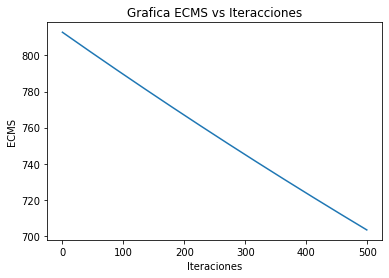

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00760703]
 [ 0.14589709]
 [ 0.00056729]
 [ 0.18655297]
 [ 0.12276975]
 [-0.01743444]
 [ 0.12055326]
 [-0.01071878]
 [ 0.13127053]
 [ 0.09924746]
 [ 0.18613645]
 [ 0.17949134]
 [ 0.00736734]
 [ 0.08054878]
 [ 0.00161679]
 [-0.18966752]
 [ 0.05855624]
 [-0.02293723]
 [ 0.05259963]
 [-0.01124688]
 [ 0.07302795]
 [ 0.04483504]
 [-0.189486  ]
 [-0.18484703]
 [-0.00737505]
 [ 0.05540281]
 [ 0.00209904]
 [ 0.1897046 ]
 [ 0.03995969]
 [-0.02377138]
 [ 0.03288018]
 [-0.0164239 ]
 [ 0.05055312]
 [ 0.03027589]
 [ 0.18971435]
 [ 0.18901517]
 [ 0.00737481]
 [ 0.03929238]
 [ 0.00187827]
 [-0.18971626]
 [ 0.02779026]
 [-0.02256594]
 [ 0.01988023]
 [-0.0154394 ]
 [ 0.03641631]
 [ 0.02146369]
 [-0.189714  ]
 [-0.18958202]
 [-0.00737482]
 [ 0.02930819]
 [ 0.00156331]
 [ 0.18971489]
 [ 0.02029578]
 [-0.02050606]
 [ 0.01242566]
 [-0.02096423]
 [ 0.02715222]
 [ 0.01617985]
 [ 0.18971529]
 [ 0.18969964]]

Error Final durante el entrenamiento = 682.844212

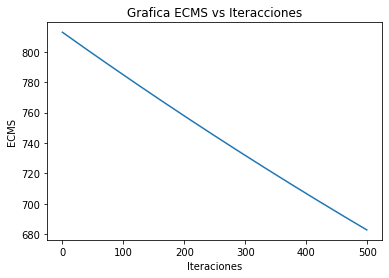

Vector de parámetros del modelo:

[[-2.80822753e+00]
 [ 4.10900571e-03]
 [ 4.50655436e+00]
 [-5.89050435e-01]
 [ 7.23993079e+00]
 [ 3.23747323e+00]
 [-1.32674586e+00]
 [ 6.08862433e+00]
 [-3.82104657e-01]
 [ 3.55226825e+00]
 [ 2.25285422e+00]
 [ 7.49271936e+00]
 [ 7.23626724e+00]]

Error Final durante el entrenamiento = 47.350256150664336


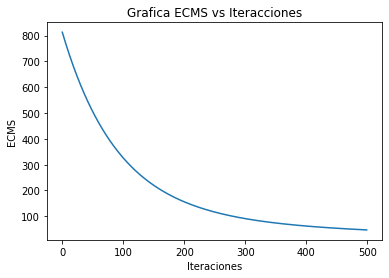

Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.01490994]
 [ 2.89308443]
 [-0.57428934]
 [ 4.6808036 ]
 [ 2.03521865]
 [-0.67231835]
 [ 3.73102718]
 [-0.22535147]
 [ 2.12074828]
 [ 1.49709264]
 [ 4.81532689]
 [ 4.81366142]
 [-0.04199219]
 [ 0.68755378]
 [-0.38617754]
 [-5.11297541]
 [-0.0545221 ]
 [-0.97988582]
 [ 1.7921886 ]
 [-0.52348212]
 [ 0.14332138]
 [-0.15920842]
 [-5.08452756]
 [-4.91042198]]

Error Final durante el entrenamiento = 19.395056809154482


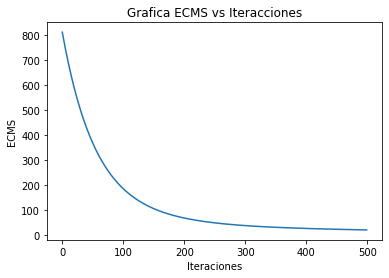

Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.05423485]
 [ 2.16725591]
 [-0.44192242]
 [ 3.45234118]
 [ 1.56894118]
 [-0.34095294]
 [ 2.59474406]
 [-0.05019539]
 [ 1.57376111]
 [ 1.18179575]
 [ 3.54627364]
 [ 3.50428192]
 [-0.07216559]
 [ 0.5597997 ]
 [-0.22984194]
 [-3.75351826]
 [ 0.04035025]
 [-0.54848025]
 [ 1.11035935]
 [-0.30844784]
 [ 0.1209889 ]
 [-0.02815731]
 [-3.73198637]
 [-3.6289863 ]
 [ 0.07159819]
 [-0.00519073]
 [-0.2204082 ]
 [ 3.71356806]
 [-0.36697464]
 [-0.5089059 ]
 [ 0.52628932]
 [-0.13169101]
 [-0.37288291]
 [-0.30395523]
 [ 3.71692883]
 [ 3.70527229]]

Error Final durante el entrenamiento = 13.53232189764733


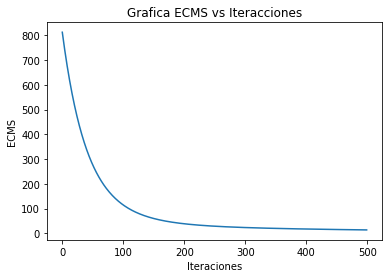

Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.02544698]
 [ 1.73883971]
 [-0.35307514]
 [ 2.72137206]
 [ 1.27995333]
 [-0.2193748 ]
 [ 1.97669601]
 [-0.05242256]
 [ 1.27544913]
 [ 0.98225706]
 [ 2.78197833]
 [ 2.76270495]
 [-0.03798229]
 [ 0.50043375]
 [-0.14490768]
 [-2.94121461]
 [ 0.10378638]
 [-0.31057695]
 [ 0.79790271]
 [-0.1528407 ]
 [ 0.15176819]
 [ 0.05242947]
 [-2.92737377]
 [-2.83666977]
 [ 0.03760539]
 [ 0.06717948]
 [-0.13901183]
 [ 2.9135759 ]
 [-0.20318129]
 [-0.26715279]
 [ 0.33680666]
 [-0.08122062]
 [-0.22899589]
 [-0.15191596]
 [ 2.915593  ]
 [ 2.9103464 ]
 [-0.037616  ]
 [-0.18639982]
 [-0.07110382]
 [-2.91796131]
 [-0.36474717]
 [-0.21485923]
 [ 0.01499505]
 [-0.13504608]
 [-0.43114207]
 [-0.23534821]
 [-2.91758239]
 [-2.91325943]]

Error Final durante el entrenamiento = 11.345170378458583


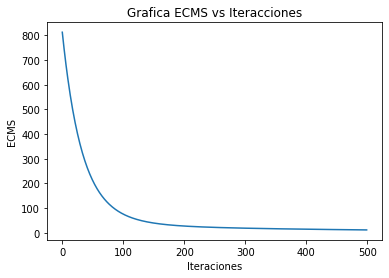

Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.01823895]
 [ 1.44275936]
 [-0.28648341]
 [ 2.23998554]
 [ 1.07428863]
 [-0.15635493]
 [ 1.61051965]
 [-0.03090335]
 [ 1.07696218]
 [ 0.82389072]
 [ 2.28582491]
 [ 2.26337447]
 [-0.02779669]
 [ 0.44186068]
 [-0.09768636]
 [-2.40982215]
 [ 0.12855635]
 [-0.20827454]
 [ 0.64641822]
 [-0.11624231]
 [ 0.1727319 ]
 [ 0.07742172]
 [-2.39987769]
 [-2.32869581]
 [ 0.02752749]
 [ 0.09670908]
 [-0.09183498]
 [ 2.38999523]
 [-0.10910223]
 [-0.15753617]
 [ 0.27092491]
 [-0.04200109]
 [-0.12911866]
 [-0.0772402 ]
 [ 2.39128524]
 [ 2.38574989]
 [-0.02753439]
 [-0.10196605]
 [-0.03390134]
 [-2.39296864]
 [-0.2294471 ]
 [-0.10612897]
 [ 0.00794821]
 [-0.08659788]
 [-0.28678379]
 [-0.13533381]
 [-2.39274599]
 [-2.38972952]
 [ 0.02753422]
 [-0.20346237]
 [-0.01253855]
 [ 2.39253414]
 [-0.26786279]
 [-0.05968902]
 [-0.14419655]
 [-0.04267525]
 [-0.36164152]
 [-0.14074286]
 [ 2.39257338]
 [ 2.39298497]]

Error Final durante el entrenamiento = 10.4814296

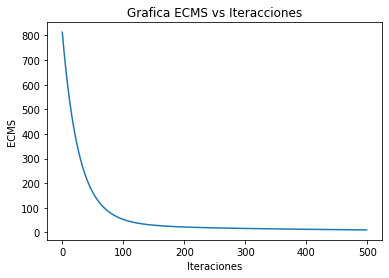

Vector de parámetros del modelo:

[[-7.13434276]
 [-0.04222545]
 [ 1.16254411]
 [ 0.18671947]
 [15.64402184]
 [ 0.81116412]
 [-1.50899274]
 [ 1.63969106]
 [ 1.19774302]
 [-5.33625924]
 [ 0.03741049]
 [17.88292905]
 [ 8.26915101]]

Error Final durante el entrenamiento = 0.9775752961991931


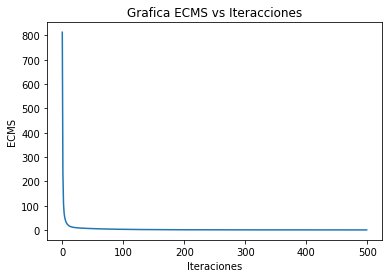

Vector de parámetros del modelo:

[[-7.13434276]
 [-0.01938498]
 [ 1.83229721]
 [-0.18890207]
 [ 6.083978  ]
 [ 0.83467322]
 [-0.26098652]
 [ 2.22942213]
 [ 0.17869887]
 [ 0.26150871]
 [ 0.31954187]
 [ 5.78817067]
 [ 6.33455632]
 [-0.01935957]
 [-0.94529872]
 [ 0.14771158]
 [-6.64904932]
 [-0.75440461]
 [ 0.16482834]
 [-1.10829549]
 [-0.02019642]
 [-0.87484497]
 [-0.30612212]
 [-6.76309439]
 [-6.42556303]]

Error Final durante el entrenamiento = 0.07845199979234525


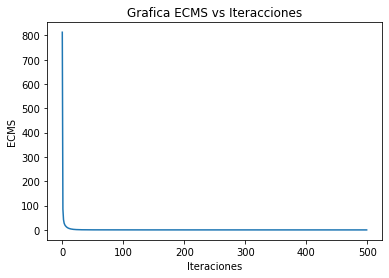

Vector de parámetros del modelo:

[[-7.13434276]
 [-0.01795219]
 [ 1.32584501]
 [-0.12552837]
 [ 4.03873382]
 [ 0.43111559]
 [-0.04152775]
 [ 1.23649634]
 [-0.03566814]
 [ 0.04338207]
 [ 0.116356  ]
 [ 4.02024194]
 [ 3.72622692]
 [-0.00777677]
 [-0.40817532]
 [ 0.17617977]
 [-4.44675365]
 [-0.6486106 ]
 [-0.03562896]
 [-0.30393249]
 [-0.01614423]
 [-0.62694937]
 [-0.35271846]
 [-4.50813573]
 [-4.87730847]
 [ 0.00806354]
 [-0.31198486]
 [-0.09685206]
 [ 4.48436905]
 [ 0.04196032]
 [ 0.04008069]
 [-0.2887527 ]
 [ 0.07995777]
 [ 0.33299087]
 [ 0.30685858]
 [ 4.465329  ]
 [ 4.20666186]]

Error Final durante el entrenamiento = 0.026102487460899878


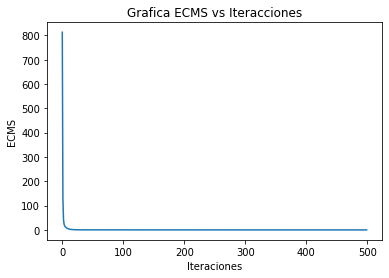

Vector de parámetros del modelo:

[[-7.13434276e+00]
 [-1.58681302e-02]
 [ 1.04084390e+00]
 [-8.30168799e-02]
 [ 2.98024712e+00]
 [ 3.82110933e-01]
 [ 1.89726740e-02]
 [ 7.52536218e-01]
 [-8.46526996e-02]
 [ 2.20744430e-01]
 [ 1.52348942e-01]
 [ 3.18889381e+00]
 [ 2.96938943e+00]
 [-4.75601036e-03]
 [-2.88036452e-01]
 [ 1.24732041e-01]
 [-3.32161791e+00]
 [-5.83429035e-01]
 [ 2.80425002e-02]
 [-3.56481752e-01]
 [-4.12471399e-02]
 [-5.17995048e-01]
 [-3.62740090e-01]
 [-3.30194357e+00]
 [-3.40229465e+00]
 [ 4.77808533e-03]
 [-2.88372536e-01]
 [-4.02312925e-02]
 [ 3.32817618e+00]
 [-2.61259284e-01]
 [-5.16938023e-03]
 [-1.99943725e-01]
 [ 6.32175316e-02]
 [-1.17076395e-01]
 [-3.95512663e-02]
 [ 3.32744453e+00]
 [ 3.23849843e+00]
 [-4.75820393e-03]
 [-2.63477827e-02]
 [-3.55435142e-02]
 [-3.32032403e+00]
 [ 2.03939239e-01]
 [-1.35587131e-02]
 [ 1.49830846e-01]
 [ 1.31853073e-02]
 [ 4.17092364e-01]
 [ 2.65919640e-01]
 [-3.32106961e+00]
 [-3.34953252e+00]]

Error Final durante el entrenamie

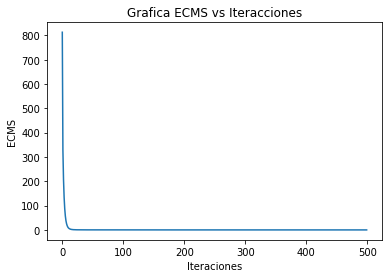

Vector de parámetros del modelo:

[[-1.85202465e+15]
 [-9.87788990e+27]
 [-2.88766528e+29]
 [-4.10487796e+28]
 [-2.54131613e+29]
 [-2.84434331e+29]
 [-8.77881227e+28]
 [-3.23427766e+28]
 [-4.37787308e+28]
 [-2.63075064e+29]
 [-2.67649056e+29]
 [-2.25603115e+29]
 [-2.15170524e+29]
 [ 7.35617928e+27]
 [-2.64000325e+29]
 [-6.32372118e+28]
 [ 2.19089445e+29]
 [-2.48987704e+29]
 [-9.24883794e+28]
 [ 5.47123651e+28]
 [-4.68178822e+28]
 [-2.31425988e+29]
 [-2.29757023e+29]
 [ 2.23778262e+29]
 [ 2.17902274e+29]
 [-7.44003374e+27]
 [-2.45171535e+29]
 [-5.62006985e+28]
 [-2.25724869e+29]
 [-2.32422243e+29]
 [-7.78238655e+28]
 [ 5.77348555e+28]
 [-4.91305516e+28]
 [-2.14939213e+29]
 [-2.13272461e+29]
 [-2.24918875e+29]
 [-2.24248643e+29]
 [ 7.43733250e+27]
 [-2.28910913e+29]
 [-4.93996834e+28]
 [ 2.24671249e+29]
 [-2.15383367e+29]
 [-6.49586540e+28]
 [ 5.13874000e+28]
 [-3.04798302e+28]
 [-2.00816029e+29]
 [-1.96986804e+29]
 [ 2.24818034e+29]
 [ 2.24643654e+29]
 [-7.43742788e+27]
 [-2.14916785e+2

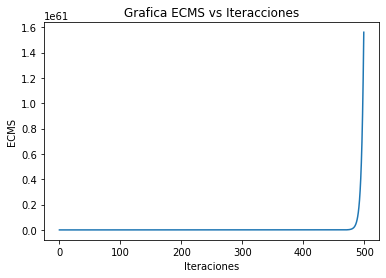

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [154]:

import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types
 
k=0
for eta, grado in df_types.index:
  W,Error,trainingError = simulacion(grado,float(eta),False)

  df_types["ECM_Entrenamiento"][k] = str(trainingError)
  df_types["ECM_Prueba"][k] = str(Error)
  k=k+1    



df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [155]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento              ECM_Prueba
Tasa de aprendizaje Grado del polinomio                                                
1e-1                1                        0.9775752961991931      1323.8770206809468
                    2                       0.07845199979234525       778.5218253112232
                    3                      0.026102487460899878       690.2331167652487
                    4                      0.011738944770606921       680.6499964607167
                    5                    1.5603169565477297e+61  1.4752669004688885e+60
1e-3                1                        47.350256150664336      432.23837215035917
                    2                        19.395056809154482       666.7086861202492
                    3                         13.53232189764733       714.7263534639739
                    4                        11.345170378458583       716.3726048028661
                    5                        10.481429642201139       711.2596887212198
1e-5                1                         774.0544407909563       703.3758081471533
                    2                         748.1860686316447       709.8817822551225
                    3                         724.9884414455062       709.8470702955602
                    4                         703.4089638629132       711.3700120556157
                    5                         682.8442125040657       711.4024391442923

## Ejercicio 5: Pruebas

En la celda de código del Ejercicio # 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferentes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

4.1 ¿Qué sucede con los valores del ECM?



Los valores sin normalizar el error escala a numeros muy altos  y por eso python no los puede interpretar por sus numeros altos quedan nan .mientras, con los valores normalizados el  error no suber a numeros tan grandes.



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

Vector de parámetros del modelo:

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

Error Final durante el entrenamiento = nan


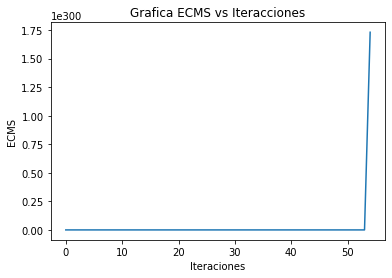


Error durante la prueba = nan


(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]), nan, 'nan')

In [156]:
simulacion(1, 0.0001, True, False)

4.2 ¿A qué se debe lo que observa?


Cuando no se normalizan los datos, las muestras pueden tener datos muy alejados entre si, por tanto  sus escalas pueden ser diferentes y sus datos mas dispersos,lo que puede aumentar  el error.

4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n  y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?

La normalización de los datos hace que funcionen en la misma escala, es un ajuste matetico para que se puedan trabajar los datos con un margen de error mas bajo, no es necesaria pero se aconceja aplicarlo por que optimiza los algoritmos y ayuda a la convergencia.
Los procesos de normalización mas comunes son:


*   Puntuación Estandar (Z-Score)
*   T de estudent
*   Coeficiente de variación
*   Momento estandarizado
*   Studentized Residual
*   Característica scaling

En el laboratorio se empleo el proceso Z-score.

